# Data: Load, clean, and save

**Table of contents**<a id='toc0_'></a>    
- 1.1. [Reading in data](#toc1_1_)    
    - 1.1.1. [Getting the right columns and rows](#toc1_1_1_)    
    - 1.1.2. [Renaming variables](#toc1_1_2_)    
    - 1.1.3. [Dropping observations that are not actually municipalities](#toc1_1_3_)    
    - 1.1.4. [Summary statistics](#toc1_1_4_)    
- 2. [Long vs. wide datasets: `pd.wide_to_long()`](#toc2_)    
    - 2.1.1. [Plotting interactively](#toc2_1_1_)    
  - 2.2. [Income](#toc2_2_)    
  - 2.3. [Municipal area](#toc2_3_)    
- 3. [Writing data](#toc3_)    
- 4. [Summary](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Today you will learn:
1. how to **load and save data** both to and from offline sources (e.g. CSV or Excel). 
2. and how to clean, rename, structure and index your data.

In [30]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

**Check:** We make sure that we have the **data/** subfolder, and that it has the datasets we need.

In [31]:
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/RAS200.xlsx')
assert os.path.isfile('data/INDKP107.xlsx')

# Print everything in data
os.listdir('data/')

['ARE207.xlsx',
 'Area.csv',
 'INDKP107.xlsx',
 'INDKP107_long.csv',
 'RAS200.xlsx',
 'RAS200_long.csv']

### 1.1. <a id='toc1_1_'></a>[Reading in data](#toc0_)

Pandas offers a lot of facilities for **reading and writing to different formats**. The functions have logical names: 

* CSV: `pd.read_csv()`
* SAS: `pd.read_sas()`
* Excel: `pd.read_excel()`
* Stata: `pd.read_stata()`
* Parquet: `pd.read_parquet()`

And many more... 

**Inspecting:** 

* `df.head(10)` is used to inspect the first 10 rows
* `df.sample(10)` is used to look at 10 random rows

**Example:** Raw download from [DST](https://www.statbank.dk/statbank5a/SelectTable/Omrade0.asp?PLanguage=1)  

Clearly not quite right!

In [32]:
filename = 'data/RAS200.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(5)

,"Activity and employment rates (end November) by frequency, sex, age, ancestry, region and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Units: Per cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,Employment rate,Total,16-64 years,Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5,77.1
3,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0,77.7
4,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6,76.7


We need to clean this **mess** up.

#### 1.1.1. <a id='toc1_1_1_'></a>[Getting the right columns and rows](#toc0_)

**Skipping rows:** Clearly, we should **skip** the first three rows and the first four columns

In [37]:
empl = pd.read_excel(filename, skiprows=2)
empl.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Employment rate,Total,16-64 years,Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5,77.1
1,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0,77.7
2,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6,76.7
3,NaN,NaN,NaN,NaN,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1
4,NaN,NaN,NaN,NaN,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6,79.1


**Dropping columns:** The first couple of columns are not needed and contain only missing values (denoted by `NaN` (not-a-number)), so we will drop those. 

**Note:** `df.drop()` is a function that the data frame object applies to itself. Hence, no return value is used.  

In [40]:
# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Unnamed: ' + str(num) for num in range(4)] # use list comprehension to create list of columns
print(drop_these)

empl.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
empl.head(5)

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']


,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5,77.1
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0,77.7
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6,76.7
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6,79.1


> **Alternative:** Use `del empl['Unnamed: 0'], empl['Unnamed: 1']..`.  

**But!** that borders on code repetition.. Would give you 4 places to make code changes rather than 2 as with the list comprehension above, in case data changed. 

#### 1.1.2. <a id='toc1_1_2_'></a>[Renaming variables](#toc0_)

We are not happy with the column comprising regions, which is currently called `Unnamed: 4`.   

We rename using `df.rename(columns=dict)`, where dict must be a Python *dictionary*. Why a dictionary? It is simply the most practical solution if you are renaming several columns at once. 

In [41]:
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)
empl.head(5)

,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5,77.1
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0,77.7
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6,76.7
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6,79.1


**Rename all year columns:** We also see that the employment rate in 2008 has been named `2008`.   

This is allowed in Python, but having a **variable named as a number** can cause **problems** with some functions (and many other programming languages do not even allow it), so let us change their names.   

To change all columns, we need to create a dictionary that maps each of the years {2008, ..., 2016} to {e2008, ..., e2016}. 

In [42]:
col_dict = {}
for i in range(2008, 2021+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'empl{i}'

col_dict = {str(i) : f'empl{i}' for i in range(2008,2021+1)}
col_dict

{'2008': 'empl2008',
 '2009': 'empl2009',
 '2010': 'empl2010',
 '2011': 'empl2011',
 '2012': 'empl2012',
 '2013': 'empl2013',
 '2014': 'empl2014',
 '2015': 'empl2015',
 '2016': 'empl2016',
 '2017': 'empl2017',
 '2018': 'empl2018',
 '2019': 'empl2019',
 '2020': 'empl2020',
 '2021': 'empl2021'}

In [43]:
empl.rename(columns = col_dict, inplace=True)
empl.head(10)

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020,empl2021
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5,77.1
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0,77.7
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6,76.7
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6,79.1
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4,82.3
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5,79.7
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4,75.3,75.9,74.9,77.4
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2,71.3,71.5,70.8,73.6
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5,75.3,75.5,74.7,77.0


**A big NO-NO!!** is to put *white spaces* in column names. You can theoretically have a column such as empl['e 2017'] in a pandas df, but this is *very likely* to get messy. And you can no longer use `.`notation. 

**Extract:** Now we can find the employment rate in the municipality of Copenhagen: 

In [45]:
empl.loc[empl.municipality == 'Copenhagen']

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020,empl2021
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1


#### 1.1.3. <a id='toc1_1_3_'></a>[Dropping observations that are not actually municipalities](#toc0_)

The dataset contains observations like "Region Hovedstaden", which is not a municipality, so we want to drop such rows. To do this, we can use the `df['var'].str` functionalities. These are all sorts of functions that work with strings, in particular searching for instances of specific content by `df['var'].str.contains('PATTERN')`. 

In [46]:
# Build up a logical index I
I = empl.municipality.str.contains('Region')
I |= empl.municipality.str.contains('Province')
I |= empl.municipality.str.contains('All Denmark')
empl.loc[I, :]

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020,empl2021
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5,77.1
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0,77.7
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6,76.7
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4,75.3,75.9,74.9,77.4
21,Province Nordsjælland,79.4,76.9,76.3,76.1,75.8,75.8,76.1,76.5,77.1,77.6,78.4,78.9,78.4,80.4
33,Province Bornholm,68.0,66.4,65.9,67.1,66.0,66.1,67.0,67.3,69.3,70.2,70.2,71.4,70.3,73.8
36,Region Sjælland,75.7,72.7,71.9,71.6,70.9,71.0,71.3,71.9,72.6,73.3,74.4,75.1,74.7,76.9
37,Province Østsjælland,79.5,76.7,75.8,75.7,75.0,75.0,75.3,76.0,76.7,77.7,78.5,78.7,78.3,80.4
43,Province Vest- og Sydsjælland,74.2,71.1,70.3,69.9,69.2,69.3,69.7,70.1,70.8,71.5,72.6,73.5,73.1,75.4
56,Region Syddanmark,75.7,72.0,71.2,70.7,70.0,70.1,70.5,70.8,71.6,72.5,73.6,74.1,73.8,76.5


**Delete these rows:**

In [47]:
empl = empl.loc[I == False] # keep everything else
empl.head(10)

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020,empl2021
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6,79.1
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4,82.3
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5,79.7
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2,71.3,71.5,70.8,73.6
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5,75.3,75.5,74.7,77.0
10,Brøndby,72.3,69.6,68.3,68.2,67.4,67.5,67.3,68.0,69.1,69.4,70.2,71.0,69.5,73.2
11,Gentofte,79.2,76.6,76.4,76.1,75.5,75.2,74.7,75.1,75.2,76.1,76.6,77.0,76.1,78.2
12,Gladsaxe,77.9,75.0,74.1,73.6,73.2,73.1,73.4,74.1,74.3,75.3,76.3,77.3,76.6,79.1
13,Glostrup,79.2,76.1,74.5,75.0,74.7,74.8,74.4,75.0,75.5,76.0,76.5,77.5,76.6,78.8


Very important: **reset index**

In [48]:
empl.reset_index(inplace = True, drop = True) # Drop old index too
empl.iloc[0:4,:]

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020,empl2021
0,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1
1,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6,79.1
2,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4,82.3
3,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5,79.7


#### 1.1.4. <a id='toc1_1_4_'></a>[Summary statistics](#toc0_)

To get an overview of employments across municipalities we can use the function `df.describe()`.

In [49]:
empl.describe()

,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020,empl2021
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,76.629293,73.419192,72.794949,72.591919,72.020202,72.091919,72.431313,72.876768,73.669697,74.463636,75.461616,75.996970,75.475758,77.730303
std,3.727538,3.626537,3.617062,3.691211,3.804240,3.704484,3.660062,3.647275,3.549690,3.554114,3.423589,3.360802,3.293007,3.099357
min,62.900000,63.400000,62.400000,61.500000,60.700000,61.200000,61.600000,62.200000,62.600000,63.100000,64.300000,65.400000,64.800000,67.000000
25%,74.650000,71.350000,70.550000,70.000000,69.450000,69.700000,70.200000,70.750000,71.500000,72.500000,73.550000,74.100000,73.850000,76.150000
50%,76.800000,73.300000,72.900000,72.600000,72.100000,72.200000,72.600000,73.100000,74.000000,74.600000,75.700000,76.300000,75.600000,78.000000
75%,79.150000,75.900000,75.200000,75.050000,74.500000,74.500000,74.700000,75.200000,75.700000,76.700000,77.700000,78.050000,77.600000,79.700000
max,84.000000,81.500000,81.400000,80.500000,80.700000,80.500000,80.900000,81.200000,81.800000,82.200000,83.000000,83.200000,82.700000,84.300000


**Single descriptive statistic:** We can also just get the mean for each year:

In [52]:
empl.iloc[:,1:].mean()

empl2008    76.629293
empl2009    73.419192
empl2010    72.794949
empl2011    72.591919
empl2012    72.020202
empl2013    72.091919
empl2014    72.431313
empl2015    72.876768
empl2016    73.669697
empl2017    74.463636
empl2018    75.461616
empl2019    75.996970
empl2020    75.475758
empl2021    77.730303
dtype: float64

## 2. <a id='toc2_'></a>[Long vs. wide datasets: `pd.wide_to_long()`](#toc0_)

Often in economic applications, it can be useful to switch between *wide* vs. *long* formats (long is sometimes referred to as *tall*, e.g. in Stata). This is done by the commands `pd.wide_to_long()` (and `pd.long_to_wide()`).  Many types of analysis are easier to do in one format than in another so it is extremely useful to be able to switch comfortably between formats. 

**Common:** Think of a dataset as having an `ID` and a `PERIOD` variable. In our dataset `empl`, the `ID` variable is `municipality`, and the `PERIOD` variable is `year`. 

**Wide dataset:** The default from Statistics Denmark: 1 row in data per `ID` and a variable for each `PERIOD`. If there are more than one variable per observation that varies by period, then a new block of period-wise cases must be created along columns.  

**Long dataset:** There is one row for each combination of (`ID`, `PERIOD`). Vertical blocks of periods. 

A **long dataset** is often easier to work with if you have more than one time-varying variable in the data set. 

In general, Pandas will assume that the variables in the *wide* format have a particular structure: namely they are of the form `XPERIOD`, where `X` is called the "stub". In our case, the variable names are e.g. `e2011`, so the stub is `e` and the period (for that variable) is `2011`. You'll want to clean out the variable names if there is anything after the `period` part.

In [53]:
empl

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020,empl2021
0,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8,76.1
1,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6,79.1
2,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4,82.3
3,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5,79.7
4,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2,71.3,71.5,70.8,73.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,73.1,69.1,68.5,68.9,68.8,69.7,70.1,70.9,72.2,73.0,73.8,73.9,74.3,76.2
95,Rebild,81.0,77.0,76.9,77.0,77.4,77.3,77.5,78.0,79.0,79.4,80.2,80.5,80.1,82.5
96,Thisted,76.9,73.3,72.4,72.3,71.5,71.3,71.5,72.1,73.2,74.5,75.5,75.9,75.7,77.9
97,Vesthimmerlands,76.9,72.7,72.6,71.9,71.5,71.2,71.7,72.1,73.1,73.9,75.1,75.2,74.8,77.1


In [54]:
empl_long = pd.wide_to_long(empl, stubnames='empl', i='municipality', j='year')
empl_long.head(10)

,,empl
municipality,year,
Copenhagen,2008,72.5
Frederiksberg,2008,75.6
Dragør,2008,80.5
Tårnby,2008,79.0
Albertslund,2008,73.1
Ballerup,2008,75.9
Brøndby,2008,72.3
Gentofte,2008,79.2
Gladsaxe,2008,77.9


**Note:** The variables `municipality` and `year`  are now in the index!! We see that because they are "below" `e` in the `head` overview. 

In [58]:
# The index variable now consists of tuples. 
print(empl_long.index.values[0:8])

[('Copenhagen', 2008) ('Frederiksberg', 2008) ('Dragør', 2008)
 ('Tårnby', 2008) ('Albertslund', 2008) ('Ballerup', 2008)
 ('Brøndby', 2008) ('Gentofte', 2008)]


The index is now a [Multiindex](https://pandas.pydata.org/docs/user_guide/advanced.html#multiindex-advanced-indexing), as it has multiple levels.

We can **select a specific municipality** using ``.xs``:

In [59]:
empl_long.xs('Roskilde',level='municipality')

,empl
year,
2008,79.1
2009,76.3
2010,75.2
2011,74.9
2012,74.1
2013,74.0
2014,74.0
2015,74.5
2016,75.6


Or ``.loc[]`` in a special way:

In [62]:
empl_long.loc[empl_long.index.get_level_values('municipality') == 'Roskilde', :]

empl
municipality year      
Roskilde     2008  79.1
             2009  76.3
             2010  75.2
             2011  74.9
             2012  74.1
             2013  74.0
             2014  74.0
             2015  74.5
             2016  75.6
             2017  76.8
             2018  77.7
             2019  78.1
             2020  77.6
             2021  79.8

**Alternative:** Reset the index, and use `.loc` as normal.

In [63]:
empl_long = empl_long.reset_index()
empl_long.loc[empl_long.municipality == 'Roskilde', :]

,municipality,year,empl
33,Roskilde,2008,79.1
132,Roskilde,2009,76.3
231,Roskilde,2010,75.2
330,Roskilde,2011,74.9
429,Roskilde,2012,74.1
528,Roskilde,2013,74.0
627,Roskilde,2014,74.0
726,Roskilde,2015,74.5
825,Roskilde,2016,75.6
924,Roskilde,2017,76.8


#### 2.1.1. <a id='toc2_1_1_'></a>[Plotting interactively](#toc0_)
A pandas DataFrame has built-in functions for plotting. Works a bit differently from matplotlib. 

Example: 

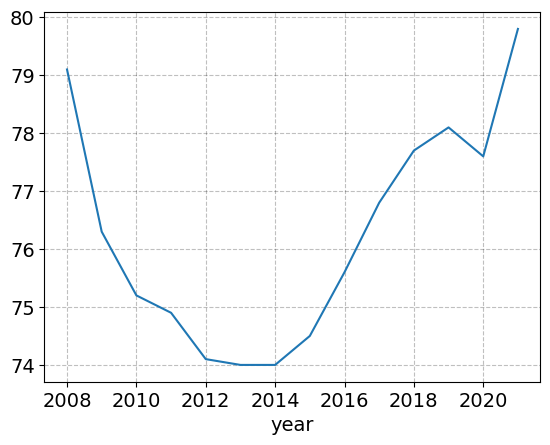

In [66]:
# Data frame with roskilde
empl_roskilde = empl_long.loc[empl_long['municipality'] == 'Roskilde', :]

# Plot the content of the data frame
empl_roskilde.plot(x='year',y='empl',legend=False);

We can even do it **interactively**:

In [67]:
import ipywidgets as widgets
def plot_e(df, municipality): 
    I = df['municipality'] == municipality
    ax=df.loc[I,:].plot(x='year', y='empl', style='-o', legend=False)

In [69]:
widgets.interact(plot_e, 
    df = widgets.fixed(empl_long),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique(), 
                                    value='Roskilde')
); 

interactive(children=(Dropdown(description='Municipality', index=33, options=('Copenhagen', 'Frederiksberg', '…

### 2.2. <a id='toc2_2_'></a>[Income](#toc0_)

Next, we will read in the avg. disposable income for highly educated in each municipality. Here we do the cleaning, renaming and structuring in a few condensed lines.

In [71]:
# a. load
inc = pd.read_excel('data/INDKP107.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(4)], axis=1, inplace=True) # using list comprehension
inc.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True) 
inc.rename(columns = {str(i): f'inc{i}' for i in range(2004,2021+1)}, inplace=True) # using dictionary comprehension

# c. drop rows with missing values. Denoted na
inc.dropna(inplace=True)

# d. remove non-municipalities. Notice how to avoid code repetition!
for val in ['Region','Province', 'All Denmark']: 
    I = inc.municipality.str.contains(val)
    inc.drop(inc[I].index, inplace=True) # .index -> get the indexes of the series
    
inc.head(5)

,municipality,inc2008,inc2009,inc2010,inc2011,inc2012,inc2013,inc2014,inc2015,inc2016,inc2017,inc2018,inc2019,inc2020,inc2021
3,Copenhagen,259216.0,266636.0,297422.0,303717.0,308601.0,316362.0,325070.0,334083.0,327179.0,333579.0,344440.0,355525.0,376029.0,403607.0
4,Frederiksberg,296988.0,304406.0,349249.0,356537.0,363466.0,376072.0,379308.0,397210.0,389151.0,409097.0,421688.0,433786.0,464703.0,498460.0
5,Dragør,371290.0,375508.0,425605.0,471854.0,457410.0,469260.0,482857.0,494313.0,475567.0,490152.0,492319.0,519800.0,535535.0,571133.0
6,Tårnby,288973.0,296610.0,336077.0,368789.0,347705.0,357150.0,359455.0,372565.0,360230.0,373304.0,382370.0,403253.0,429736.0,450045.0
8,Albertslund,269855.0,283067.0,313767.0,308977.0,320298.0,328004.0,334630.0,344447.0,334094.0,332943.0,343028.0,342374.0,356920.0,378128.0


**Convert** wide -> long:

In [72]:
inc_long = pd.wide_to_long(df=inc, stubnames='inc', i='municipality', j='year')
inc_long.reset_index(inplace=True)
inc_long.head(5)

,municipality,year,inc
0,Copenhagen,2008,259216.0
1,Frederiksberg,2008,296988.0
2,Dragør,2008,371290.0
3,Tårnby,2008,288973.0
4,Albertslund,2008,269855.0


### 2.3. <a id='toc2_3_'></a>[Municipal area](#toc0_)

Finally, let's read in a dataset on municipality areas in $\text{km}^2$. 

In [73]:
# a. load
area = pd.read_excel('data/ARE207.xlsx', skiprows=2)

# b. clean and rename
area.rename(columns = {'Unnamed: 0':'municipality','2023':'km2'}, inplace=True)

# c. drop rows with missing
area.dropna(inplace=True)

# d. remove non-municipalities
for val in ['Region','Province', 'All Denmark']: 
    I = area.municipality.str.contains(val)
    area.drop(area[I].index, inplace=True)
    
area.head(5)

,municipality,km2
2,Copenhagen,90.1
3,Frederiksberg,8.7
4,Dragør,18.3
5,Tårnby,66.1
6,Albertslund,23.4


## 3. <a id='toc3_'></a>[Writing data](#toc0_)

As with reading in data, we have the corresponding functions for **writing data**:

* CSV: `pd.to_csv()`
* SAS: `pd.to_sas()`
* Excel: `pd.to_excel()`
* Stata: `pd.to_stata()`
* Parquet: `pd.to_parquet()`

Let's **save our dataset to CSV form**. We will set `index=False` to avoid saving the index (which does not mean anything here but can in other contexts be an annoying thing). 

In [74]:
empl_long.to_csv('data/RAS200_long.csv', index=False)
inc_long.to_csv('data/INDKP107_long.csv', index=False)
area.to_csv('data/Area.csv', index=False)

## 4. <a id='toc4_'></a>[Summary](#toc0_)
**Be cautious**
Code for cleaning data tend to get long and repetetive. <br> 
It is important to **DRY**! Don't Repeat Yourself. Errors crop up in data cleaning when you just copy blocks of code around. Avoid repetitions at all costs.

**This lecture**: We have discussed

1. Loading and saving data
2. Basic data cleaning (renaming, droping etc.)
3. Wide $\leftrightarrow$ long transformations